# **Regression**

Predicting housing values, using various algorithms such as Linear Regression, Decision Trees, and Random Forests.

---

## **Intallations**

In [1]:
! pip install matplotlib numpy pandas scipy scikit-learn seaborn

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## **Get the data**

In [3]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH)

/var/folders/xk/r3ls7bqd0b3fdrwsj9bcv3t40000gn/T/ipykernel_47887/459406077.py:15: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


In [5]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
df = load_housing_data(housing_path=HOUSING_PATH)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## **Overview**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


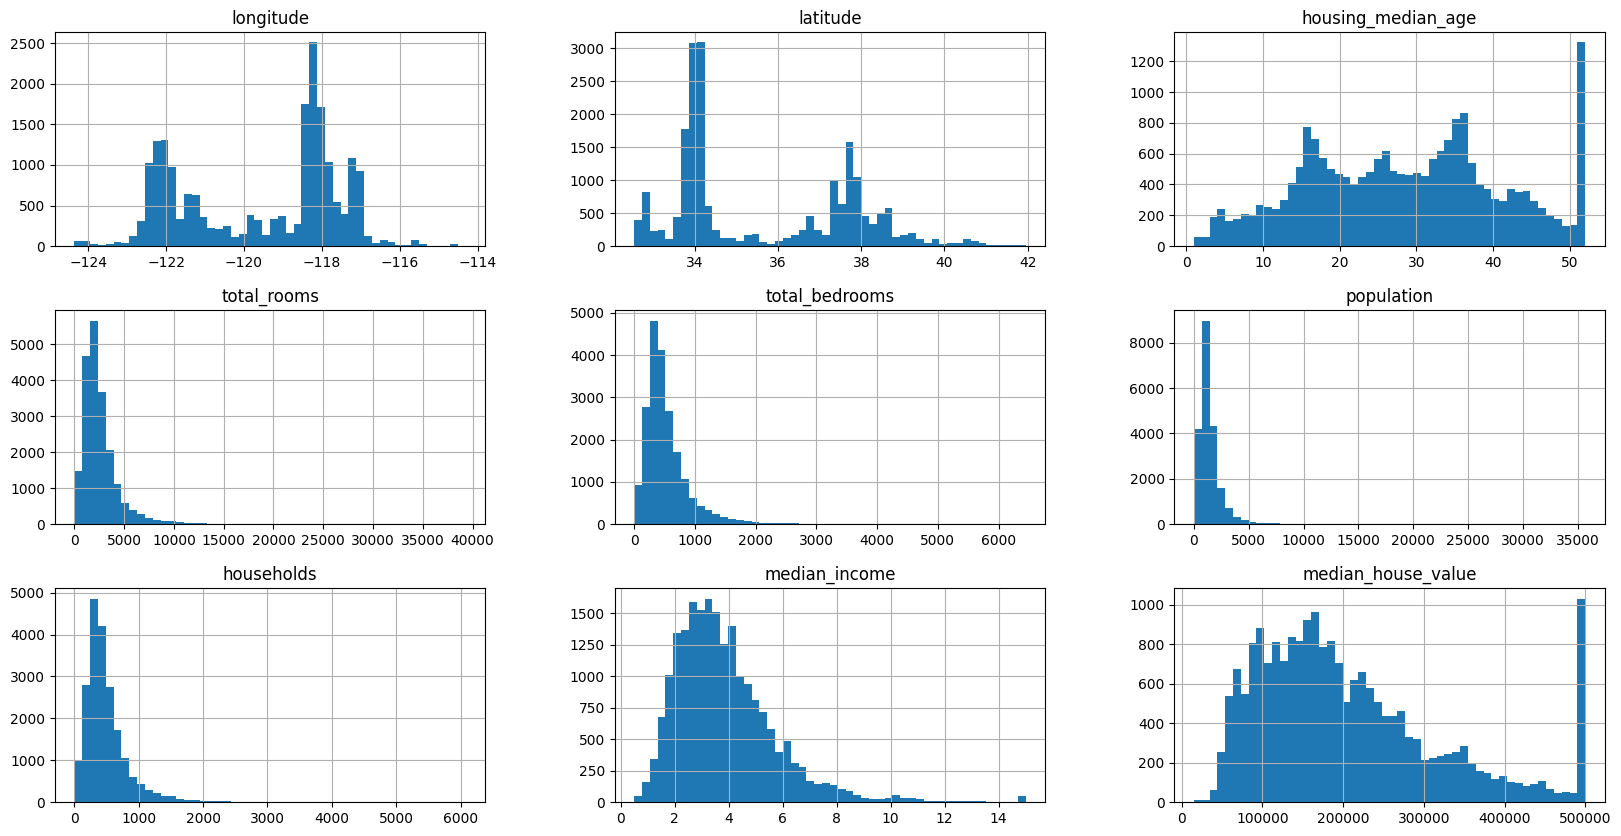

In [11]:
df.hist(bins=50, figsize=(20,10))
plt.show()

- median_income data has been scaled and capped.  
- median_house_value and housing_median_age has been capped (as evidenced by the spike at 500k).

## **Test and train splits**

In [12]:
# for illustration only

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(df))
    test_set_size = int(len(df) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

## **Sampling**

**Stratified sampling**  

The population is divided into homogeneous subgroups called strata, and the right number of instances is sampled from each stratum to guarantee that the test set is representative of the overall population.

<Axes: >

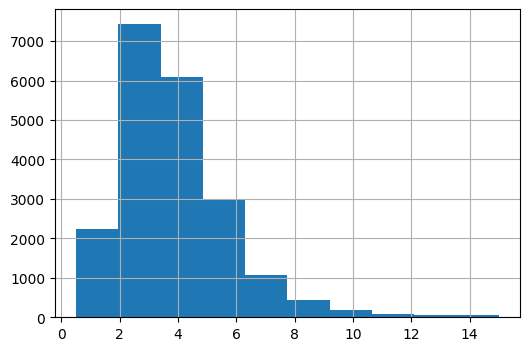

In [14]:
# Suppose median income is an important attribute to predict median housing prices.
# You may want to ensure that the test set is representative of the various categories of incomes in the whole dataset.
df.median_income.hist(figsize=(6,4))

In [15]:
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [16]:
df["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<Axes: >

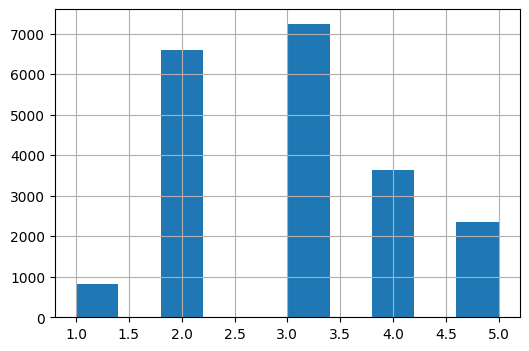

In [17]:
df["income_cat"].hist(figsize=(6,4))

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

# Ensures that income_cat is represented appropriately in both samples
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [19]:
# remore income_cat column to return to original data frame

for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

## **EDA**

In [20]:
# create copy to avoid impacting the original data
df = strat_train_set.copy()

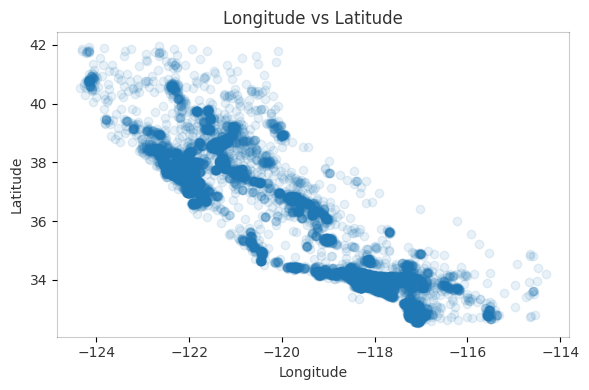

In [21]:
# alpha shows places of high density
plt.figure(figsize=(6,4))
plt.scatter(data=df, x='longitude', y='latitude', alpha=0.1)
plt.xlabel("Longitude", alpha=0.8)
plt.ylabel("Latitude", alpha=0.8)
plt.title("Longitude vs Latitude", alpha=0.8)
plt.xticks(alpha=0.8)
plt.yticks(alpha=0.8)
plt.tight_layout()
for spine in plt.gca().spines.values():
    spine.set_alpha(0.2)
plt.show()

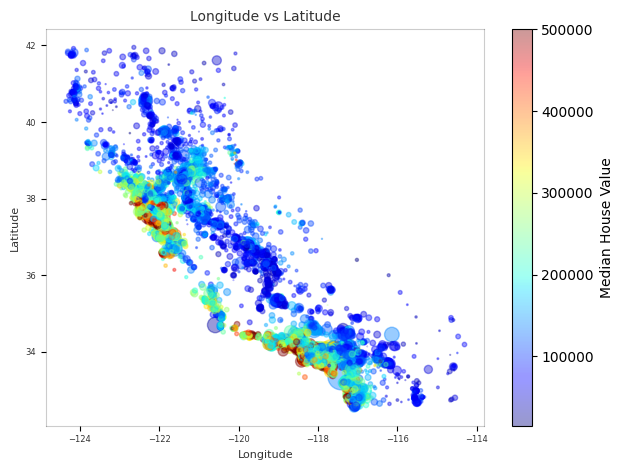

In [58]:
# (option s) represents the population (radius of each circle).
# (option c) represents the price the (color of each circle).
# (option cmap) represents a predefined color map.

plt.scatter(data=df, x='longitude', y='latitude', alpha=0.4, s=df['population']/100, c="median_house_value", cmap=plt.get_cmap("jet"))
plt.colorbar(label="Median House Value")
plt.xlabel("Longitude", alpha=0.8, fontsize=8)
plt.ylabel("Latitude", alpha=0.8, fontsize=8)
plt.title("Longitude vs Latitude", alpha=0.8, fontsize=10)
plt.xticks(alpha=0.8, fontsize=6)
plt.yticks(alpha=0.8, fontsize=6)
plt.tight_layout()
for spine in plt.gca().spines.values():
    spine.set_alpha(0.2)
plt.show()


In [23]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [24]:
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

**Insight**: Negative correlation between median_house_value and latitude means as you go north median_house_value declines

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

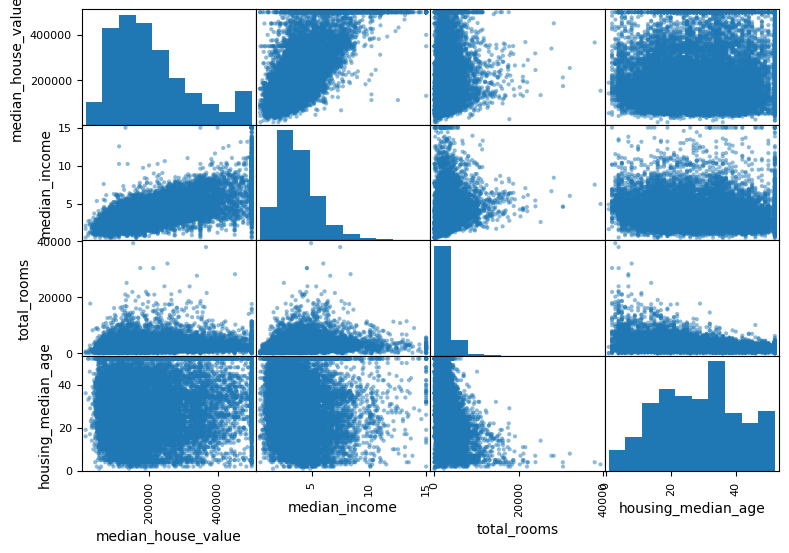

In [25]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(df[attributes], figsize=(9, 6))

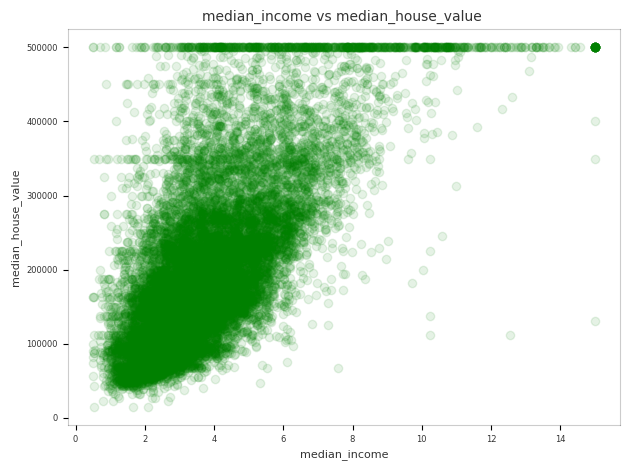

In [26]:
plt.scatter(data=df, x="median_income", y="median_house_value", alpha=0.1, color="green")
plt.xlabel("median_income", alpha=0.8, fontsize=8)
plt.ylabel("median_house_value", alpha=0.8, fontsize=8)
plt.title("median_income vs median_house_value ", alpha=0.8, fontsize=10)
plt.xticks(alpha=0.8, fontsize=6)
plt.yticks(alpha=0.8, fontsize=6)
plt.tight_layout()
for spine in plt.gca().spines.values():
    spine.set_alpha(0.2)
plt.show()


**Insight**: Horizontal line at $500k (due to cap). But why is there a horizontal line at $450k, $350k, $280k.

In [27]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [28]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]

In [29]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241


In [30]:
num_matrix = df.select_dtypes(include=[np.number])
corr_matrix = num_matrix.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

**Insight**: The new bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms. Apparently houses with a lower bedroom/room ratio tend to be more expensive.

## **Prepare the data**

In [107]:
# We don’t necessarily want to apply the same transformations to the predictors and the target values.
# drop() creates a copy of the data and does not affect strat_train_set
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [108]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


## **Handling text & categorical values**

In [40]:
# One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values.

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
housing_cat = housing[["ocean_proximity"]]
housing_cat_encoded = encoder.fit_transform(housing_cat)
print(housing_cat_encoded)
# mapping of classes
print(encoder.categories_)

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]], shape=(16512, 1))

In [65]:
from sklearn.preprocessing import OneHotEncoder

# Setting sparse=False would create a standard numpy array
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat)

# Output is Scipy sparse matrix, which saves memory by only storing the location of the nonzero elements
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

## **Custom transformer**

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]
    
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [44]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


---

## **Feature scaling & pipelines**

There are two common ways to get all attributes to have the same scale: min-max scaling (normalisation) and standardization.

All but the last estimator must be transformers (i.e., they must have a fit_transform() method). The names can be anything you like.

In [112]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [113]:
# Numerical pipeline

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

# fit on the numerical training data
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [114]:
# Apply different transformations to different columns (numerical + categorical)

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

# fit on the numerical & categorical training data
housing_prepared = full_pipeline.fit_transform(housing)

---

## **Select and train model**

### **Linear regression**

In [115]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [116]:
# test the model on 5 instances of your test data
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [123]:
# measure the RMSE - note we are using training data here which is not ideal

from sklearn.metrics import mean_squared_error
import numpy as np

# predict once data has gone through transformation pipeline (housing_prepared)
housing_prediction = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_prediction)
lin_rmse = np.sqrt(lin_mse)
print(f"RMSE prediction error of ${lin_rmse:.2f}")

Prediction error of $68627.87


Data appears to be underfitting

In [127]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_prediction)
print(f"MAE prediction error of ${lin_mae:.2f}")

MAE prediction error of $49438.67


### **Decision tree regressor**

In [144]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [145]:
# test on some data
test_data = housing.iloc[:5]
actual_y = housing_labels.iloc[:5]
tranformed_test_data = full_pipeline.transform(test_data)
prediction = tree_reg.predict(tranformed_test_data)
print("Predictions:\t", prediction)
print("Labels:\t\t", list(actual_y))

Predictions:	 [ 72100. 279600.  82700. 112500. 238300.]
Labels:		 [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [162]:
# calculate error (note we are using test data here which is not ideal)
# housing_prepared is the output after running through our transformation pipeline
tree_predicted = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, tree_predicted)
tree_rmse = np.sqrt(tree_mse)
print("MSE: ", tree_mse)
print("RMSE: ", tree_rmse)

MSE:  0.0
RMSE:  0.0


**Insight**: Model has badly overfit the data

## **Cross validation**

Used to evaluate model performance.  

<code>cross_val_score</code> is a more robust alternative to <code>train_test_split</code> because it splits the dataset into multiple training and validation folds (e.g., 5 folds in 5-fold cross-validation). Each fold acts as a validation set once, ensuring the model is tested on different subsets of data.  

This reduces the risk of overfitting or bias from relying on a single train-validation split.

In [157]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [163]:
# Scikit-Learn cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the MSE.
# This is why the code below computes -scores before calculating the square root.
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores_tree = np.sqrt(-tree_scores)

In [166]:
import numpy as np
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores_lin = np.sqrt(-lin_scores)

In [191]:
def display_scores(scores):
    print("All scores: ", scores)
    print("-"*50)
    print("Average score: ", np.mean(scores))
    print("-"*50)
    print(f"Standard deviation of scores: {np.std(scores):.2f}")

In [192]:
print("Decision tree scores", )
print("-"*50)
display_scores(rmse_scores_tree)
print("\n")
print("Linear regression scores", )
print("-"*50)
display_scores(rmse_scores_lin)

Decision tree scores
--------------------------------------------------
All scores:  [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
--------------------------------------------------
Average score:  71629.89009727491
--------------------------------------------------
Standard deviation of scores: 2914.04


Linear regression scores
--------------------------------------------------
All scores:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
--------------------------------------------------
Average score:  69104.07998247063
--------------------------------------------------
Standard deviation of scores: 2880.33


**Insight**: The Decision Tree model performs worse than the Linear Regression model.

### **Random forests**

Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions.  

In [203]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=10, random_state=42)
random_forest.fit(housing_prepared, housing_labels)
random_forest_predictions = random_forest.predict(housing_prepared)
random_forest_mse = mean_squared_error(housing_labels, random_forest_predictions)
random_forest_rmse = np.sqrt(random_forest_mse)
print("RMSE: ", random_forest_rmse)

RMSE:  22413.454658589766


In [204]:
random_forest_score = cross_val_score(random_forest, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores_random_forest = np.sqrt(-random_forest_score)

In [205]:
print("Random forest scores", )
print("-"*50)
display_scores(rmse_scores_random_forest)

Random forest scores
--------------------------------------------------
All scores:  [53519.05518628 50467.33817051 48924.16513902 53771.72056856
 50810.90996358 54876.09682033 56012.79985518 52256.88927227
 51527.73185039 55762.56008531]
--------------------------------------------------
Average score:  52792.92669114079
--------------------------------------------------
Standard deviation of scores: 2262.82


### **SVM**

In [223]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

np.float64(111095.06635291968)

---

## **How to save & load your models**

In [208]:
! pip install joblib

In [211]:
import joblib

joblib.dump(random_forest, "random_forest.pkl")
# my_model_loaded = joblib.load("my_model.pkl")

['random_forest.pkl']

In [214]:
my_model_loaded = joblib.load("random_forest.pkl")
my_model_loaded

RandomForestRegressor(n_estimators=10, random_state=42)

---

## **Fine tune your model**

Use Scikit-Learn’s GridSearchCV to search for the best hyperparameters. All you need to do is tell it which hyperparameters you want it to experiment with, and what values to try out, and it will evaluate all the possible combinations of hyperparameter values, using cross-validation.

**Note**: <code>cross_val_score</code> evaluates performance only, while <code>GridSearchCV</code> optimizes hyperparameters.  

### **Grid search**

In [224]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# When you have no idea what value a hyperparameter should have, a simple approach is to try out consecutive powers of 10 (or a smaller number if you want a more fine-grained search)
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'n_estimators': [3,10], 'max_features': [2,3,4], 'bootstrap': [False]}
]
# GridSearch will explore 12 + 6 = 18 combinations of RandomForestRegressor hyperparameter values, and it will train each model five times (five-fold cross validation).
forest_reg = RandomForestRegressor(random_state=42)
grid_search_forest = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search_forest.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

If GridSearchCV is initialized with <code>refit=True</code> (which is the default), then once it finds the best estimator using cross-validation, it retrains it on the whole training set. This is usually a good idea since feeding it more data will likely improve its performance.

In [236]:
print("Best parameters: ", grid_search_forest.best_params_)
print(f"RMSE: {np.sqrt(-grid_search_forest.best_score_):.2f}")

Best parameters:  {'max_features': 8, 'n_estimators': 30}
RMSE: 49898.99


In [231]:
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52891.66240619666 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

### **Randomized Search**

It is often preferable to use <code>RandomizedSearchCV</code> when the hyperparameter search space is large.  

This class can be used in much the same way as the <code>GridSearchCV</code> class, but instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration.  

This approach has two main benefits:
1. If you let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000 different values for each hyperparameter (instead of just a few values per hyperparameter with the grid search approach).  
2. You have more control over the computing budget you want to allocate to hyperparameter search, simply by setting the number of iterations.

In [260]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1688dad50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x13645f770>},
                   random_state=42, scoring='neg_mean_squared_error')

In [262]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [261]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50700.386174457635 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50663.56285209076 {'max_features': 3, 'n_estimators': 75}
50523.94360622104 {'max_features': 3, 'n_estimators': 88}
49521.76339475961 {'max_features': 5, 'n_estimators': 100}
50306.36122428185 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


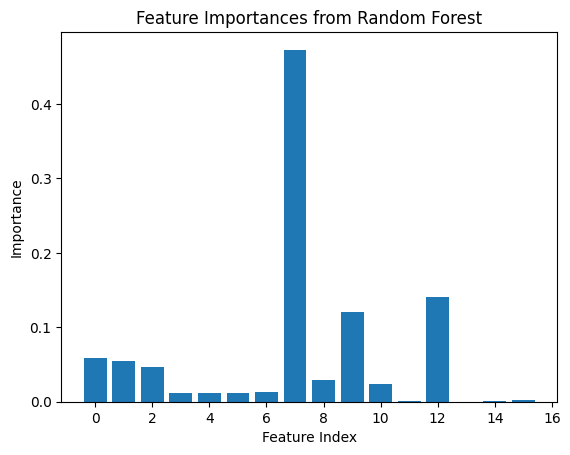

In [253]:
feature_importances = random_forest.feature_importances_

# Plotting the feature importances
plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Feature Importances from Random Forest")
plt.show()

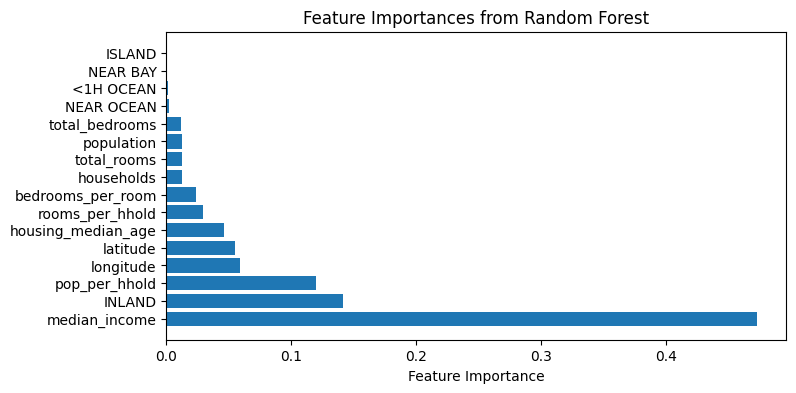

In [269]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
feature_importances = random_forest.feature_importances_
sorted_importances = sorted(zip(feature_importances, attributes), reverse=True)

# Unzip the sorted importances into two lists
importances, names = zip(*sorted_importances)

plt.figure(figsize=(8, 4))
plt.barh(names, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importances from Random Forest")
plt.show()

## **Evaulate model on the test set**

In [272]:
from sklearn.metrics import mean_squared_error
import numpy as np
best_model = grid_search_forest.best_estimator_

# .drop does not require a .copy() because drop() returns a new DataFrame that does not modify the original DataFrame in place
X_test = strat_test_set.drop(["median_house_value"], axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_transformed = full_pipeline.transform(X_test)
y_test_predictions = best_model.predict(X_test_transformed)
mse = mean_squared_error(y_test, y_test_predictions)
rmse = np.sqrt(mse)
print("Final RMSE on test set: ", rmse)

Final RMSE on test set:  47873.26095812988


We can compute a 95% confidence interval for the test RMSE:

In [274]:
from scipy import stats

confidence = 0.95
squared_errors = (y_test_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([45893.36082829, 49774.46796717])

We could compute the interval manually like this:

In [275]:
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(np.float64(45893.360828285535), np.float64(49774.46796717361))

Alternatively, we could use a z-scores rather than t-scores:

In [276]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(np.float64(45893.9540110131), np.float64(49773.921030650374))